### Ejercicio 5 
Para los datos de 'Coactivation_matrix.mat', filtre la matriz para que, para cada nodo, se mantenga aquel nodo con mayor comunicación, con el nuevo arreglo muestre los nodos y vértices del grafo.

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd
import networkx as nx
import scipy.io
from matplotlib import cm

In [6]:
data_path = r"Coactivation_matrix.mat"
mat = loadmat(data_path)
matrix = mat["Coactivation_matrix"] 

In [16]:
G = nx.from_numpy_array(matrix, create_using=nx.DiGraph)

In [18]:
for node in G.nodes():
    edges = G[node]
    if edges:
        top_neighbors = sorted(edges.items(), key=lambda x: x[1]['weight'], reverse=True)[:3]
        top_neighbors = [v[0] for v in top_neighbors]  # Obtener los nodos conectados
        for vecinos in list(edges.keys()):
            if vecinos not in top_neighbors:
                G.remove_edge(node, vecinos)


In [20]:
x, y, z = mat["Coord"][:, 0], mat["Coord"][:, 1], mat["Coord"][:, 2]

In [22]:
adj_matrix = nx.to_numpy_array(G)

In [24]:
pesoMaximo = np.max(adj_matrix) if np.max(adj_matrix) > 0 else 1
pesosNormalizados = adj_matrix / pesoMaximo
colormap = cm.viridis

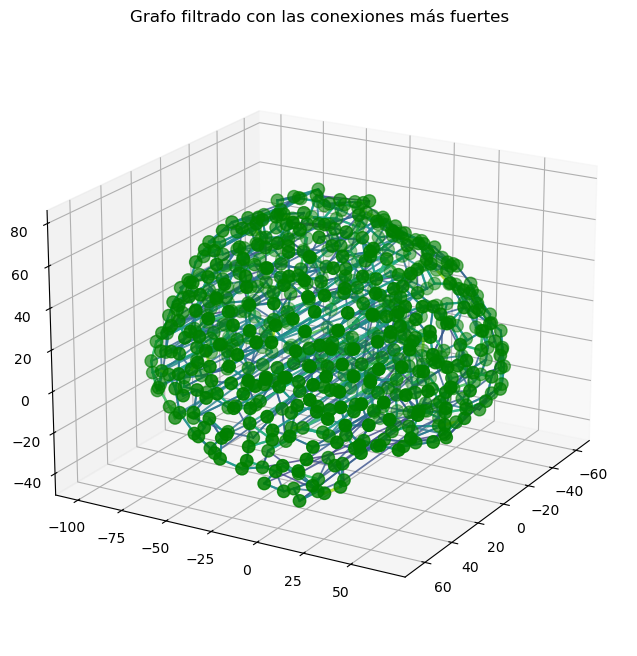

In [28]:
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection="3d")
ax.scatter3D(x, y, z, color="green", s=80)
for i in range(len(adj_matrix)):
    for j in range(len(adj_matrix)):
        weight = adj_matrix[i, j]
        if weight > 0: 
            color = colormap(pesosNormalizados[i, j])
            ax.plot(
                [x[i], x[j]],
                [y[i], y[j]],
                [z[i], z[j]],
                color=color,
                alpha=0.8,
                lw=1 + 3 * weight, 
            )
ax.view_init(elev=20.0, azim=30)
plt.title("Grafo filtrado con las conexiones más fuertes")
plt.show()

In [30]:
print(f"Número de nodos: {G.number_of_nodes()}")
print(f"Número de aristas: {G.number_of_edges()}")

Número de nodos: 638
Número de aristas: 1914
